In [1]:
import matplotlib.pyplot as plt
from matplotlib import image as mig
import numpy as np
import math

(571, 482)


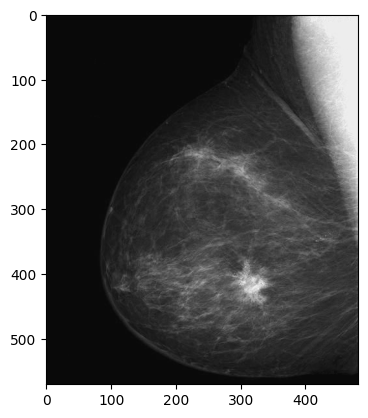

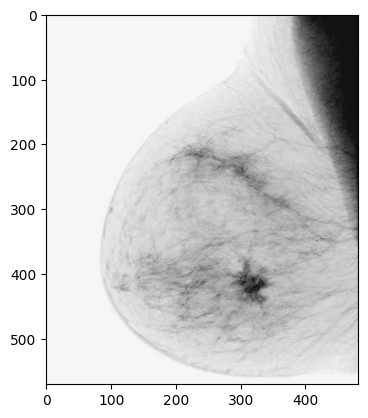

In [2]:
'''图像反转'''
imag = mig.imread(r'C:\Users\23282\Desktop\PyL\DIP\imageset\mammogram.tif')
print(imag.shape)
plt.imshow(imag,cmap='gray')
plt.show()
#图像反转    s = L-1-r
imag2 = 255-imag
plt.imshow(imag2,cmap='gray')
plt.show()

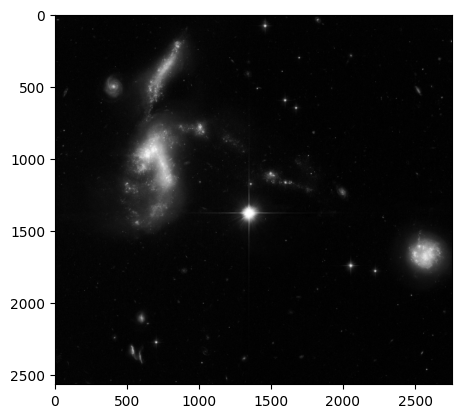

C:\Users\23282\AppData\Local\Temp\ipykernel_25588\3888638055.py:6: RuntimeWarning: divide by zero encountered in log
  imag2 = np.log(imag+1)    #c取1


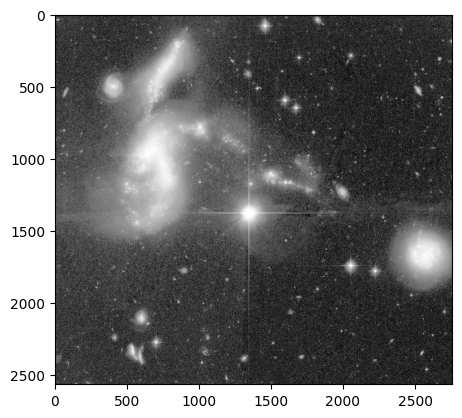

In [3]:
'''对数变换'''
imag = mig.imread(r'C:\Users\23282\Desktop\PyL\DIP\imageset\hickson-compact-group.tif')
plt.imshow(imag,cmap='gray')
plt.show()
# s = c* log(1+r)
imag2 = np.log(imag+1)    #c取1
plt.imshow(imag2,cmap='gray')
plt.show()


<Figure size 640x480 with 0 Axes>

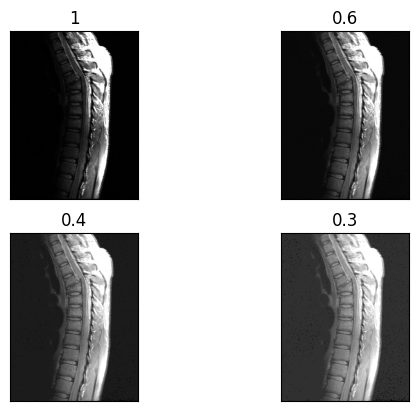

<Figure size 640x480 with 0 Axes>

In [4]:
'''使用幂律变换增强图像对比度'''
imag = plt.imread(r'C:\Users\23282\Desktop\PyL\DIP\imageset\spine.tif')
#c均取1，伽马值分别取0.6，0.4，0.3
#s = c*r^γ
im=[imag]
for i in [0.6,0.4,0.3]:
    im.append(imag**i)
for (i,j) in [(0,1),(1,0.6),(2,0.4),(3,0.3)]:
    plt.subplot(2,2,i+1)
    plt.title(j)
    plt.imshow(im[i],cmap='gray')
    plt.xticks([])  #取消坐标显示
    plt.yticks([])
plt.figure()

<Figure size 640x480 with 0 Axes>

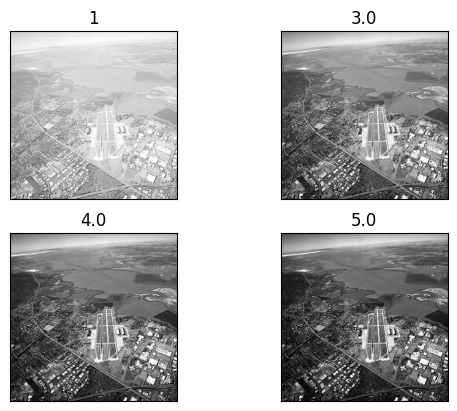

<Figure size 640x480 with 0 Axes>

In [5]:
'''使用幂律变换增强图像对比度'''
imag = plt.imread(r'C:\Users\23282\Desktop\PyL\DIP\imageset\aerialview-washedout.tif')
#c均取1，伽马值分别取3.0,4.0,5.0
#s = c*r^γ
im=[imag]
for i in [3.0,4.0,5.0]:
    im.append(imag**i)
for (i,j) in [(0,1),(1,3.0),(2,4.0),(3,5.0)]:
    plt.subplot(2,2,i+1)
    plt.title(j)
    plt.imshow(im[i],cmap='gray')
    plt.xticks([])  #取消坐标显示
    plt.yticks([])
plt.figure()

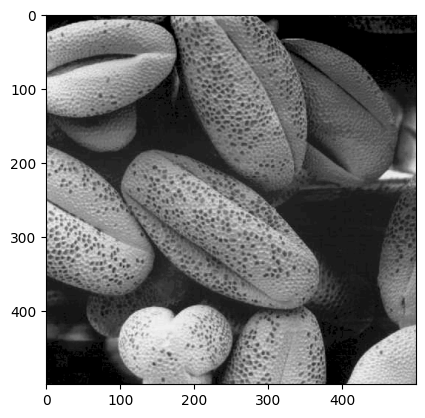

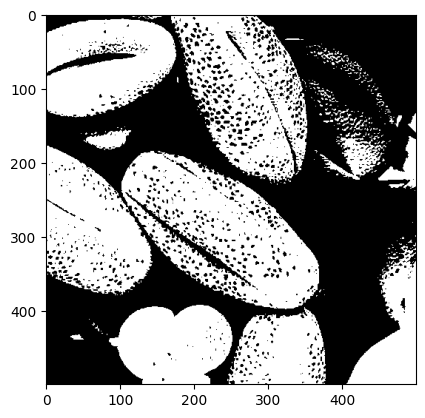

In [6]:
'''分段线性变换函数'''
'''对比度拉伸'''
imag = plt.imread(r'C:\Users\23282\Desktop\PyL\DIP\imageset\pollen-lowcontrast.tif')
mean = imag.mean()
plt.imshow(imag,cmap='gray')
plt.show()

def contpull(img,r):      #对比度拉伸函数
    imag = np.copy(img)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if imag[i][j] < r:     #小于阈值赋0，大于阈值赋1，阈值为均值
                imag[i][j] = 0
            else:
                imag[i][j] = 1
    return imag

imag = contpull(imag,mean)
plt.imshow(imag,cmap='gray')
plt.show()

<Figure size 640x480 with 0 Axes>

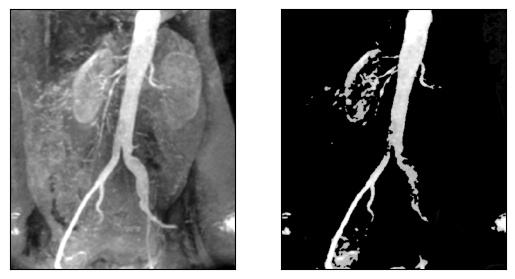

<Figure size 640x480 with 0 Axes>

In [7]:
'''灰度级分层'''
imag = plt.imread(r'C:\Users\23282\Desktop\PyL\DIP\imageset\angiogram-aortic-kidney.tif')
img=[imag]
ave = imag.mean()

def contpull(img):      #灰度级分层函数
    imag = np.copy(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if imag[i][j] < 175 and imag[i][j] > 20:     
                imag[i][j]=0
            else:
                pass
    return imag

img.append(contpull(imag))
for i in range(1,3):
    plt.subplot(1,2,i)
    plt.imshow(img[i-1],cmap='gray')
    plt.xticks([])  #取消坐标显示
    plt.yticks([])
plt.figure()

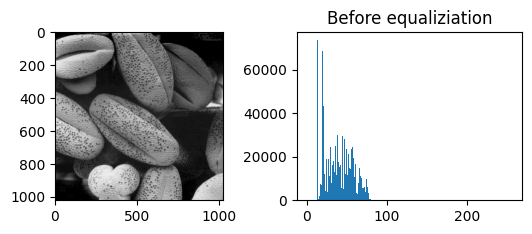

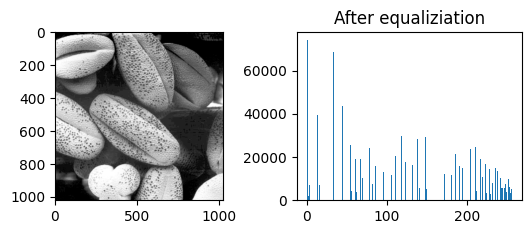

In [8]:
'''直方图均衡化'''
import cv2
# 获取灰度图像
img = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\magnified-pollen-dark.tif",0)

# 灰度图像的直方图
plt.figure()#新建一个图像
plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.subplot(2,2,2)
plt.title("Before equaliziation")
plt.hist(img.flatten(),range = (0,256),bins =  256)
plt.show()

'''
equalizeHist—直方图均衡化
函数原型:equalizeHist(src, dst=None)
src:图像矩阵(单通道图像)
'''
# 灰度图像直方图均衡化
dst = cv2.equalizeHist(img,256)

# 直方图
plt.figure()
plt.subplot(2,2,3)
plt.imshow(dst,cmap='gray')
plt.subplot(2,2,4)
plt.title('After equaliziation')
plt.hist(dst.flatten(),range = (0,256),bins =  256)
plt.show()



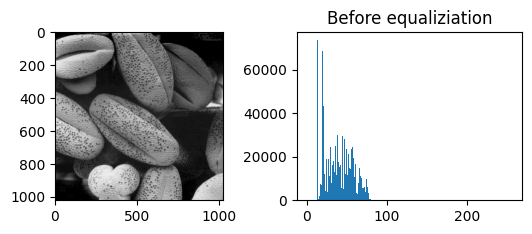

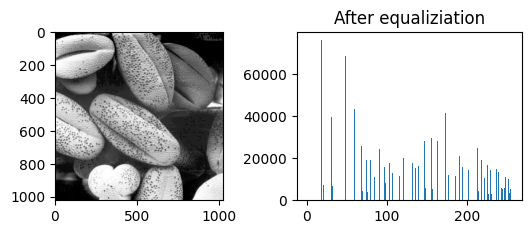

In [9]:
'''直方图均衡化函数'''
#获取图像的概率密度
def get_pdf(in_img):
    total = in_img.shape[0]*in_img.shape[1]   #计算图片总像素数
    return [ np.sum(in_img == i)/total for i in range(256)]   #求概率密度

#直方图均衡化
def hist_equal(in_img):
    #求输入图像的概率密度
    Pr = get_pdf(in_img)

    #构造输出图像
    out_img = np.copy(in_img)

    #执行直方图均衡化
    
    SUMK = 0 #累加值
    for i in range(256):
        SUMK = SUMK + Pr[i]
        out_img[(in_img == i)] = SUMK * 255    #灰度值逆归一化 ，利用掩码矩阵索引
        

    return out_img

#读入图像
ori_img = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\magnified-pollen-dark.tif",0)
# 灰度图像的直方图
plt.figure()#新建一个图像
plt.subplot(2,2,1)
plt.imshow(ori_img,cmap='gray')
plt.subplot(2,2,2)
plt.title("Before equaliziation")
plt.hist(ori_img.flatten(),range = (0,256),bins =  256)
plt.show()


# 灰度图像直方图均衡化
dst = hist_equal(ori_img)

# 均衡化后的直方图
plt.figure()
plt.subplot(2,2,3)
plt.imshow(dst,cmap='gray')
plt.subplot(2,2,4)
plt.title('After equaliziation')
plt.hist(dst.flatten(),range = (0,256),bins =  256)
plt.show()



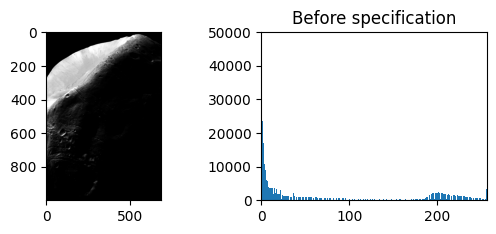

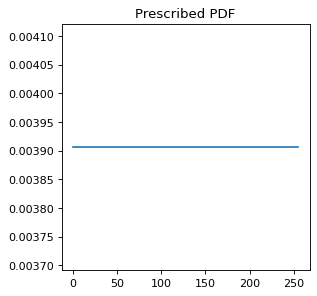

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 1

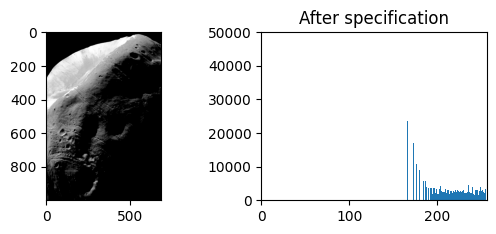

In [10]:
'''直方图匹配'''

#生成均匀分布,规定目标图像的直方图为均匀分布
def gen_eq_pdf():
    return [1.0/256.0 for i in range(256)]    #均匀概率密度 1/256


#构建目标函数的映射表
def gen_target_table(Pv):
    table = []
    SUMq = 0
    for i in range(256):
        SUMq = SUMq+Pv[i]
        table.append(round(SUMq*255,0))  #四舍五入
    return table

#直方图规定化
def hist_match(in_img = None):
    #拿到目标图像规定的概率密度，构造映射表
    Pv = gen_eq_pdf()   #均匀分布
    table = gen_target_table(Pv)
    print(table)

    #对原始图像做直方图均衡
    ori_eq_img=hist_equal(in_img)

    #构造输出图像(初始化成输入)
    out_img = np.copy(ori_eq_img)

    #执行直方图规定化
    map_val = 0  #逆映射初始值为0
    for v in range(256):
        if v in table:   #存在于映射表
            map_val = len(table)-table[::-1].index(v)-1   #某个数字出现多个映射值时，默认取最大映射值
        out_img[(ori_eq_img == v)] = map_val  #找不到映射关系，取前一个映射值
    return out_img

img = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\phobos.tif",0)
# 灰度图像的直方图
plt.figure()#新建一个图像
plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.subplot(2,2,2)
plt.title("Before specification")
plt.ylim(0,50000)
plt.xlim(0,256)
plt.hist(img.flatten(),range = (0,256),bins =  256)
plt.show()

#画出规定pdf
Pr = gen_eq_pdf()
sum = 0
y_points = []
for i in range(256):
    y_points.append(Pr[i])
x = np.arange(0,256,1)
plt.figure(figsize=(4,4),dpi=80)
plt.title('Prescribed PDF')
plt.plot(x,y_points)
plt.show()

# 灰度图像直方图规定化
dst = hist_match(img)

# 直方图均衡化后的图
plt.subplot(2,2,3)
plt.imshow(dst,cmap='gray')
plt.subplot(2,2,4)
plt.title('After specification')
plt.ylim(0,50000)
plt.xlim(0,256)
plt.hist(dst.flatten(),range = (0,256),bins =  256)
plt.show()

(512, 512)


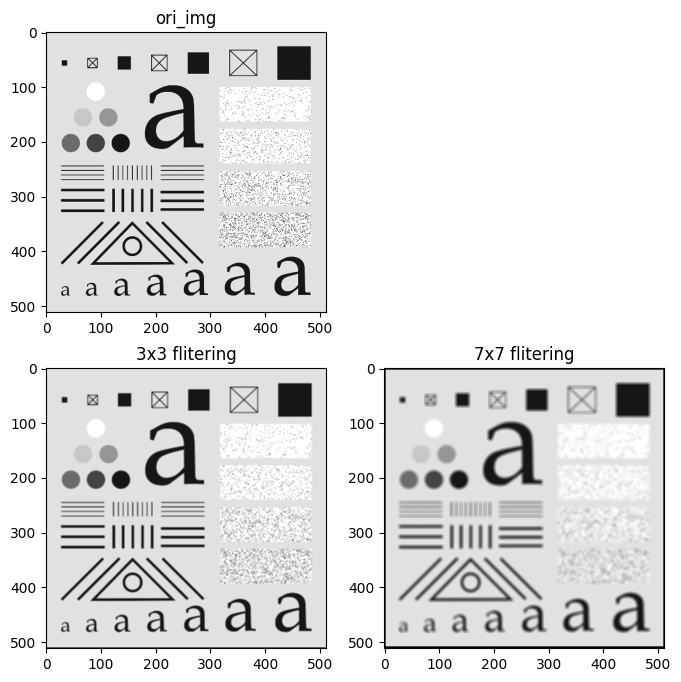

In [11]:
'''空间滤波'''
'''使用盒式核低通滤波'''
import matplotlib.pyplot as plt
import numpy as np
import cv2
#读取图像
ori_img = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\testpattern512.tif",0)
ori_img = np.array(ori_img)
print(ori_img.shape)
height = ori_img.shape[0]
width = ori_img.shape[1]
img_3x3_fliter = np.zeros((height,width),dtype = int)
img_7x7_fliter = np.zeros((height,width),dtype = int)

def Slip3x3Mean(im,i,j):   #对像素点（i，j）周围3*3的领域求均值
    sum = 0
    for m in range(-1,2):
        for n in range(-1,2):
            sum = sum+im[i+m,j+n]
    return round(sum/9)         #均值取整填入中心像素

def Slip7x7Mean(im,i,j):   #对像素点（i，j）周围7*7的领域求均值
    sum = 0
    for m in range(-3,4):
        for n in range(-3,4):
            sum = sum+im[i+m,j+n]
    return round(sum/49)         #均值取整填入中心像素

 #对原图用3*3的盒式核滤波
for i in range(1,height - 1):         
    for j in range (1,width - 1):
        img_3x3_fliter[i,j] = Slip3x3Mean(ori_img,i,j)

 #对原图用7*7的盒式核滤波
for i in range(3,height - 3):         
    for j in range (3,width - 3):
        img_7x7_fliter[i,j] = Slip7x7Mean(ori_img,i,j)

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.title('ori_img')
plt.imshow(ori_img,cmap='gray')
plt.subplot(2,2,3)
plt.title('3x3 flitering')
plt.imshow(img_3x3_fliter,cmap='gray')
plt.subplot(2,2,4)
plt.title('7x7 flitering')
plt.imshow(img_7x7_fliter,cmap='gray')
plt.show()



(512, 512)


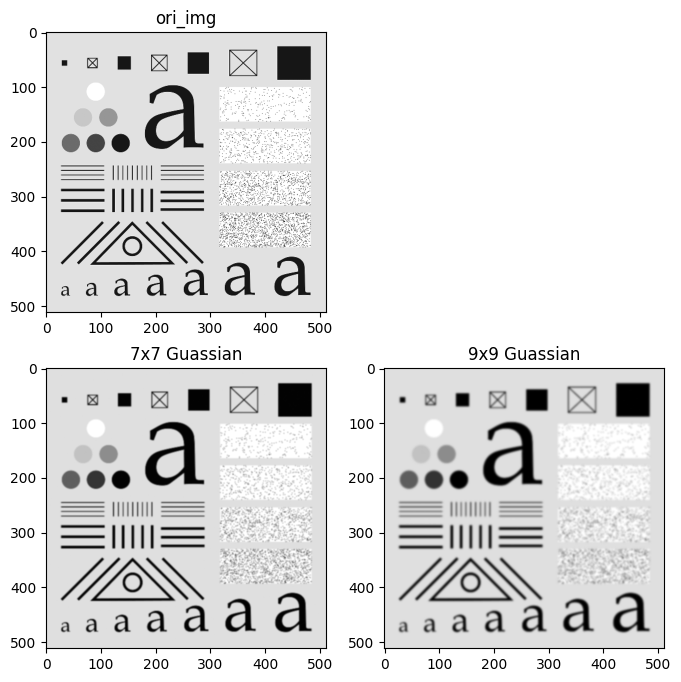

In [12]:
'''使用高斯核进行低通滤波'''
ori_img = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\testpattern512.tif",0)
ori_img = np.array(ori_img)
print(ori_img.shape)
height = ori_img.shape[0]
width = ori_img.shape[1]
img_7 = np.zeros((height,width),dtype = int)
img_9 = np.zeros((height,width),dtype = int)
'''
原型：
cv2.GaussianBlur（ SRC，ksize，sigmaX [，DST [，sigmaY [，borderType ] ] ] ） →DST
sigmaX : X方向上的高斯核标准偏差。
'''
img_7 = cv2.GaussianBlur(ori_img, (5, 5), 0)  # 5x5
img_9 = cv2.GaussianBlur(ori_img, (9, 9), 0)  # 9x9

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.title('ori_img')
plt.imshow(ori_img,cmap='gray')
plt.subplot(2,2,3)
plt.title('7x7 Guassian')
plt.imshow(img_7,cmap='gray')
plt.subplot(2,2,4)
plt.title('9x9 Guassian')
plt.imshow(img_9,cmap='gray')
plt.show()


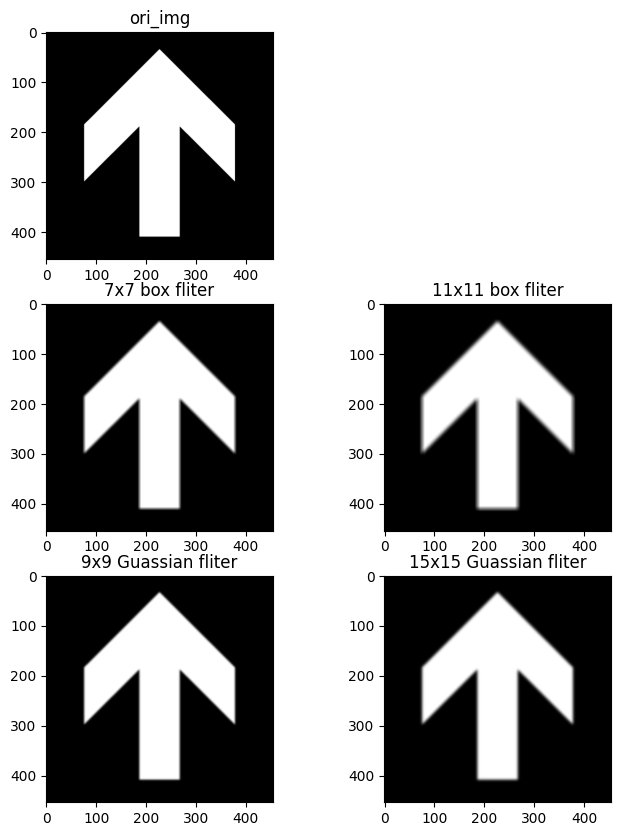

In [13]:
'''比较盒式核和高斯核的平滑特性'''
import matplotlib.pyplot as plt
import numpy as np
import cv2
#读取图像
ori_img = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\wingding-arrow-up.tif",0)
img = np.array(ori_img)

# 均值滤波
img_mean7 = cv2.blur(img, (7,7))
img_mean11 = cv2.blur(img, (11,11))

# 高斯滤波
img_Guassian9 = cv2.GaussianBlur(img,(9,9),0)
img_Guassian15 = cv2.GaussianBlur(img,(15,15),0)

# # 中值滤波
# img_median5 = cv2.medianBlur(img, 5)

# # 双边滤波
# img_bilater = cv2.bilateralFilter(img,9,75,75)

plt.figure(figsize=(8,10))
plt.subplot(3,2,1)
plt.title('ori_img')
plt.imshow(img,cmap='gray')
plt.subplot(3,2,3)
plt.title('7x7 box fliter')
plt.imshow(img_mean7,cmap='gray')
plt.subplot(3,2,4)
plt.title('11x11 box fliter')
plt.imshow(img_mean11,cmap='gray')
plt.subplot(3,2,5)
plt.title('9x9 Guassian fliter')
plt.imshow(img_Guassian9,cmap='gray')
plt.subplot(3,2,6)
plt.title('15x15 Guassian fliter')
plt.imshow(img_Guassian15,cmap='gray')
plt.show()

[[7 7 7 ... 4 4 4]
 [7 7 7 ... 4 4 4]
 [7 7 7 ... 4 4 4]
 ...
 [4 4 4 ... 3 3 3]
 [4 4 4 ... 3 3 3]
 [5 4 4 ... 3 3 3]]


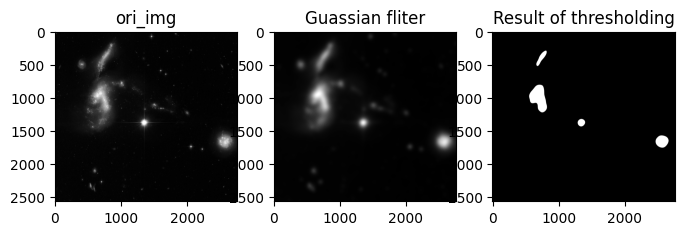

In [14]:
'''使用低通滤波和阈值处理提取区域'''
import matplotlib.pyplot as plt
import numpy as np
import cv2
#读取图像
ori_img = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\hickson-compact-group.tif",0)
img = np.array(ori_img)

#对图像用高斯核进行高斯滤波
img_Guassian = cv2.GaussianBlur(img,(151,151),25)  #大小151*151，标准差sigma=25
print(img_Guassian)
#阈值处理
extract_img = np.copy(img_Guassian)
extract_img[img_Guassian<100] = 0     #阈值设为100
extract_img[img_Guassian>100] = 255

#展示图像
plt.figure(figsize=(8,8))
plt.subplot(1,3,1)
plt.title('ori_img')
plt.imshow(img,cmap='gray')
plt.subplot(1,3,2)
plt.title('Guassian fliter')
plt.imshow(img_Guassian,cmap='gray')
plt.subplot(1,3,3)
plt.title('Result of thresholding')
plt.imshow(extract_img,cmap='gray')
plt.show()

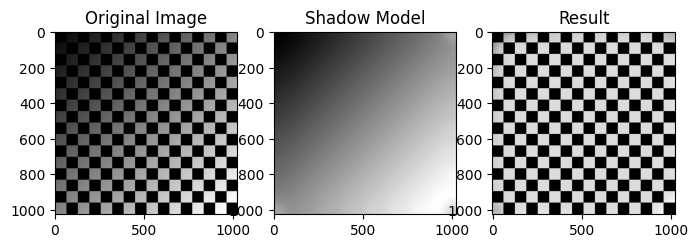

In [15]:
'''使用低通滤波校正阴影'''
import matplotlib.pyplot as plt
import numpy as np
import cv2

#读取图像
shadow_img = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\checkerboard1024-shaded.tif",0)
shadow_img = np.array(shadow_img)

#通过低通滤波估计阴影模式
shadow_model = cv2.GaussianBlur(shadow_img,(401,401),0)

#原图像除去阴影模板得到阴影校正后的图像
result = shadow_img / shadow_model

plt.figure(figsize=(8,8))
plt.subplot(1,3,1)
plt.title('Original Image')
plt.imshow(shadow_img,cmap='gray')
plt.subplot(1,3,2)
plt.title('Shadow Model')
plt.imshow(shadow_model,cmap='gray')
plt.subplot(1,3,3)
plt.title('Result')
plt.imshow(result,cmap = 'gray')
plt.show()

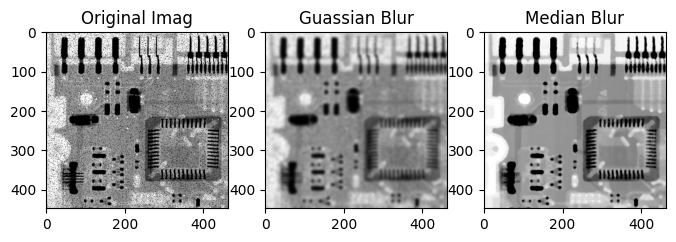

In [16]:
'''中值滤波'''
import matplotlib.pyplot as plt
import numpy as np
import cv2

#读取被椒盐噪声污染的图像
img = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\circuitboard-pepper.tif",0)
img = np.array(img)

# 选用7*7的中值滤波器核进行中值滤波
img_median = cv2.medianBlur(img, 7)

#选用19*19，标准差为3的高斯核进行高斯模糊
img_Guassian = cv2.GaussianBlur(img,(19,19),3)

plt.figure(figsize=(8,6))
plt.subplot(1,3,1)
plt.title('Original Imag')
plt.imshow(img,cmap='gray')
plt.subplot(1,3,2)
plt.title('Guassian Blur')
plt.imshow(img_Guassian,cmap='gray')
plt.subplot(1,3,3)
plt.title('Median Blur')
plt.imshow(img_median,cmap='gray')
plt.show()

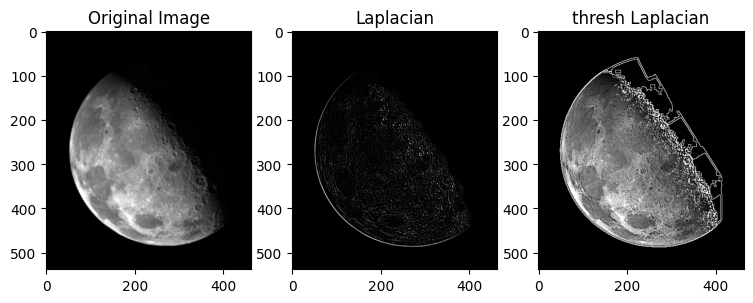

In [17]:
'''锐化（高通）滤波'''
'''拉普拉斯算子'''
import matplotlib.pyplot as plt
import numpy as np
import cv2

#读取图像
img = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\moon-blurred.tif",0)
img = np.array(img)
'''
函数原型 dst=cv2.Laplacian(src,ddepth[,ksize[,scale[,delta[,borderType]]]])
● dst代表目标图像。
● src代表原始图像。
● ddepth代表目标图像的深度。
● ksize代表用于计算二阶导数的核尺寸大小。该值必须是正的奇数。当ksize的值为1时，Laplacian算子计算时采用的 3×3的核如上所示。
● scale代表计算Laplacian值的缩放比例因子，该参数是可选的。默认情况下，该值为 1，表示不进行缩放。
● delta代表加到目标图像上的可选值，默认为0。
● borderType代表边界样式。
'''

#使用拉普拉斯算子锐化图像
lap1 = cv2.Laplacian(img,-1,ksize = 3)   #ddepth = -1时，输出图像将具有与源相同的深度
result = img - lap1

plt.figure(figsize=(9,6))
plt.subplot(1,3,1)
plt.title('Original Image')
plt.imshow(img,cmap='gray')
plt.subplot(1,3,2)
plt.title('Laplacian')
plt.imshow(lap1,cmap='gray')
plt.subplot(1,3,3)
plt.title('thresh Laplacian')
plt.imshow(result,cmap='gray')
plt.show()



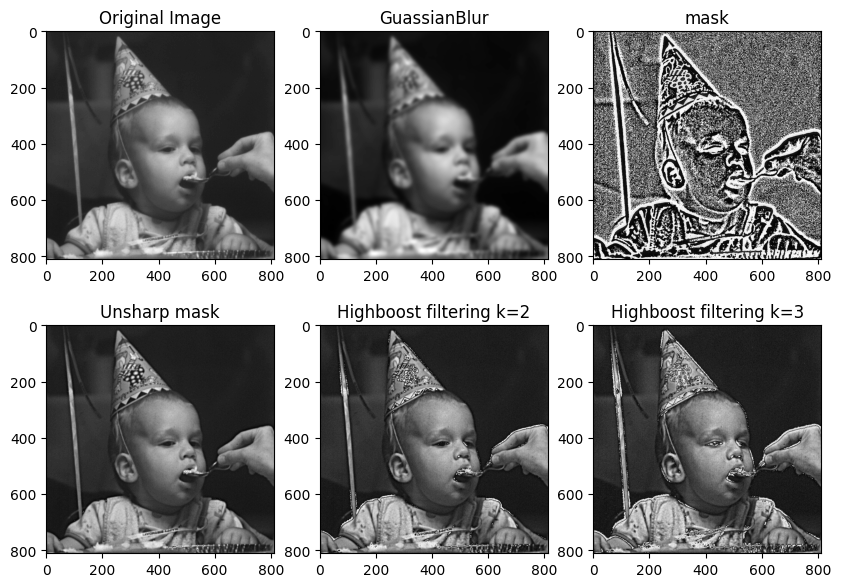

In [18]:
'''钝化掩蔽和高提升滤波'''

import matplotlib.pyplot as plt
import numpy as np
import cv2

#读取图像
img = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\baby.tif",0)
img = np.array(img)
'''钝化掩蔽'''
#利用高斯低通滤波器模糊图像
img_Gua = cv2.GaussianBlur(img,(31,31),5)

#原图像减去模糊后的图像得到模板
img_model = img - img_Gua

#g(x,y) = f(x,y) + k*模板
#k=1钝化掩蔽
result1 = img + img_model
#k>1高提升滤波
result2 = img + 2*img_model
result3 = img + 3*img_model

plt.figure(figsize=(10,7))
plt.subplot(2,3,1)
plt.title('Original Image')
plt.imshow(img,cmap='gray')
plt.subplot(2,3,2)
plt.title('GuassianBlur')
plt.imshow(img_Gua,cmap='gray')
plt.subplot(2,3,3)
plt.title('mask')
plt.imshow(img_model,cmap='gray')
plt.subplot(2,3,4)
plt.title('Unsharp mask')
plt.imshow(result1,cmap='gray')
plt.subplot(2,3,5)
plt.title('Highboost filtering k=2')
plt.imshow(result2,cmap='gray')
plt.subplot(2,3,6)
plt.title('Highboost filtering k=3')
plt.imshow(result3,cmap='gray')
plt.show()


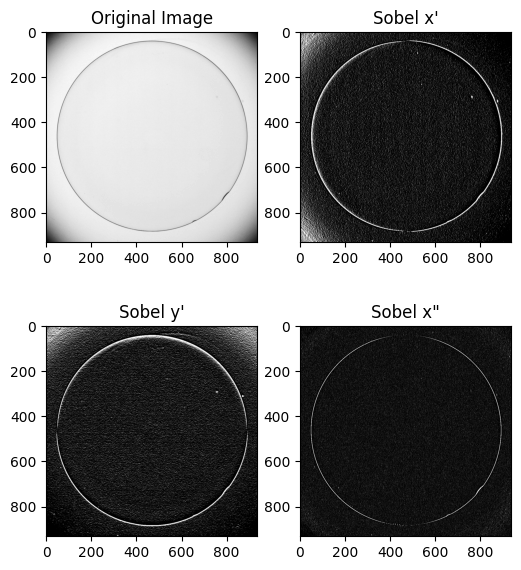

In [19]:
'''使用梯度增强边缘'''
'''Sobel算子'''
import matplotlib.pyplot as plt
import numpy as np
import cv2

#读取图像
img = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\contact-lens.tif",0)
img = np.array(img)
'''
函数原型
 dst=cv2.Sobel（src,ddepth,dx,dy[,ksize[,scale[,delta[,borderType]]]]）
dst代表目标图像。
src代表原始图像。
ddepth代表输出图像的深度。 -1默认和输入图像深度相同
dx代表x方向上的求导阶数。
dy代表y方向上的求导阶数。
ksize代表Sobel核的大小。该值为-1时，则会使用Scharr算子进行运算。
scale代表计算导数值时所采用的缩放因子，默认情况下该值是1，是没有缩放的。
delta代表加在目标图像dst上的值，该值是可选的，默认为0。
borderType代表边界样式。
'''

# 参数 1,0 为只在 x 方向求一阶导数，最大可以求 2 阶导数。
sobelx1=cv2.Sobel(img,-1,1,0,ksize=5)
# 参数 0,1 为只在 y 方向求一阶导数，最大可以求 2 阶导数。
sobely1=cv2.Sobel(img,-1,0,1,ksize=5)
#参数 2,0 为只在 x 方向求二阶导数。
sobelx2=cv2.Sobel(img,-1,2,0,ksize=5)

plt.figure(figsize=(6,7))
plt.subplot(2,2,1)
plt.title('Original Image')
plt.imshow(img,cmap='gray')
plt.subplot(2,2,2)
plt.title('Sobel x\'')
plt.imshow(sobelx1,cmap='gray')
plt.subplot(2,2,3)
plt.title('Sobel y\'')
plt.imshow(sobely1,cmap='gray')
plt.subplot(2,2,4)
plt.title('Sobel x\"')
plt.imshow(sobelx2,cmap='gray')
plt.show()

In [61]:
'''组合使用空间增强技术'''
import matplotlib.pyplot as plt
import numpy as np
import cv2
'''使用拉普拉斯增强细节，使用梯度增强突出的边缘'''
#读入人体骨骼的核扫描图像
ori_img = cv2.imread(r"C:\Users\23282\Desktop\PyL\DIP\imageset\bonescan.tif",0)
ori_img = np.array(ori_img)
#得到原图的拉普拉斯图像
img_lap = cv2.Laplacian(ori_img,-1,ksize = 3)   #ddepth = -1时，输出图像将具有与源相同的深度
#原图与其拉普拉斯图像相加，锐化
img_plus = ori_img + img_lap
#对原图像图像利用Sobel梯度增强边缘
img_sobel=cv2.Sobel(ori_img,-1,0,1,ksize=3)
#使用5x5的盒式滤波器平滑sobel图像
img_mean = cv2.blur(img_sobel, (3,3))
#将sobel图像和拉普拉斯图像相乘得到模板
img_prod = img_mean * img_lap
#将原图像和相乘后的图像相加得到锐化图像
img_shar = img_prod + ori_img
#对锐化后的图像做幂律变换
result  = img_shar ** 0.7


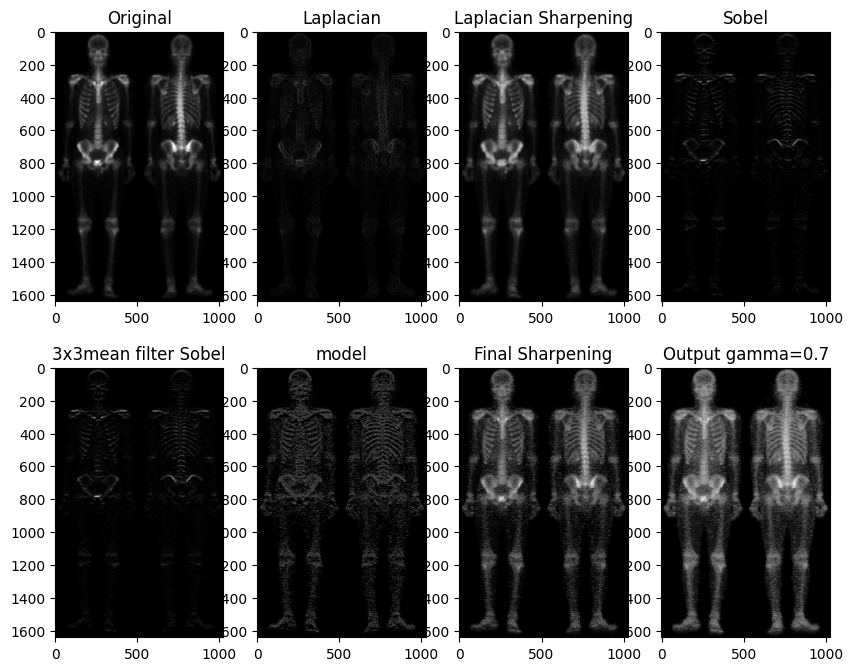

In [62]:

plt.figure(figsize=(10,8))
plt.subplot(2,4,1)
plt.title('Original')
plt.imshow(ori_img,cmap='gray')
plt.subplot(2,4,2)
plt.title('Laplacian')
plt.imshow(img_lap,cmap='gray')
plt.subplot(2,4,3)
plt.title('Laplacian Sharpening')
plt.imshow(img_plus,cmap='gray')

plt.subplot(2,4,4)
plt.title('Sobel')
plt.imshow(img_sobel,cmap='gray')

plt.subplot(2,4,5)
plt.title('3x3mean filter Sobel')
plt.imshow(img_mean,cmap='gray')

plt.subplot(2,4,6)
plt.title('model')
plt.imshow(img_prod,cmap='gray')


plt.subplot(2,4,7)
plt.title('Final Sharpening')
plt.imshow(img_shar,cmap='gray')

plt.subplot(2,4,8)
plt.title('Output gamma=0.7')
plt.imshow(result,cmap='gray')

plt.show()